# Crypto & Macro Price Pattern Exploration

This notebook explores price patterns and relationships between major cryptocurrencies (Bitcoin, Ethereum, Solana) and macro assets (bonds, US dollar, gold, etc.), with all visualizations in dark mode.

---

## 1. Import Required Libraries


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Set matplotlib dark mode
def set_dark_mode():
    plt.style.use('dark_background')
    plt.rcParams['axes.facecolor'] = '#181818'
    plt.rcParams['figure.facecolor'] = '#181818'
    plt.rcParams['axes.edgecolor'] = '#444444'
    plt.rcParams['axes.labelcolor'] = '#cccccc'
    plt.rcParams['xtick.color'] = '#cccccc'
    plt.rcParams['ytick.color'] = '#cccccc'
    plt.rcParams['text.color'] = '#cccccc'
    plt.rcParams['legend.facecolor'] = '#222222'
    plt.rcParams['legend.edgecolor'] = '#444444'
    plt.rcParams['grid.color'] = '#333333'
    plt.rcParams['axes.grid'] = True
set_dark_mode()


In [29]:
# 2. Download Historical Crypto and Macro Data (Market Cap)
crypto_tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Solana': 'SOL-USD',
}
bond_tickers = {
    'TLT': 'TLT', 'IEF': 'IEF', 'IEI': 'IEI', 'SHY': 'SHY', 'SHV': 'SHV'
}
dollar_ticker = {'USD': 'UUP'}
gold_ticker = {'Gold': 'GLD'}
macro_tickers = {**bond_tickers, **dollar_ticker, **gold_ticker}

start_date = '2017-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

def download_tickers_marketcap(tickers, start, end):
    data = {}
    for name, symbol in tickers.items():
        df = yf.download(symbol, start=start, end=end, progress=False)[['Close', 'Volume']]
        # Market cap = Close * Volume (approximation, since true supply is not available from yfinance)
        df['MarketCap'] = df['Close'] * df['Volume']
        df = df[['MarketCap']].rename(columns={'MarketCap': name})
        data[name] = df
    return pd.concat(data.values(), axis=1)

def download_tickers(tickers, start, end):
    data = {}
    for name, symbol in tickers.items():
        df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
        df = df.rename(columns={'Close': name})
        data[name] = df
    return pd.concat(data.values(), axis=1)

crypto_mcap_df = download_tickers_marketcap(crypto_tickers, start_date, end_date)
macro_df = download_tickers(macro_tickers, start_date, end_date)


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close', 'Volume']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close', 'Volume']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close', 'Volume']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:30: FutureWarning: YF.download() 

In [30]:
# 3. Normalize and Align Crypto Market Cap Series
crypto_norm = crypto_mcap_df.copy()
# Normalize to 1 at the first available value for each asset
for col in crypto_norm.columns:
    first_valid = crypto_norm[col].first_valid_index()
    crypto_norm[col] = crypto_norm[col] / crypto_norm[col].loc[first_valid]
# Align by dropping rows where all are NaN
crypto_norm = crypto_norm.dropna(how='all')
crypto_norm = crypto_norm.ffill()
crypto_norm.tail()

Price,Bitcoin,Ethereum,Solana
Ticker,,,
Date,,,
2025-06-27,32921.700484,129.466737,5693.889068
2025-06-28,21852.729384,70.343000,5168.977724
2025-06-29,26106.779957,109.072643,4545.768907
2025-06-30,30547.710618,146.255332,8849.968075
2025-07-01,31603.767275,126.114396,6364.927627


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\2256924707.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_mcap_df.index, crypto_mcap_df[col], label=col, linewidth=2)


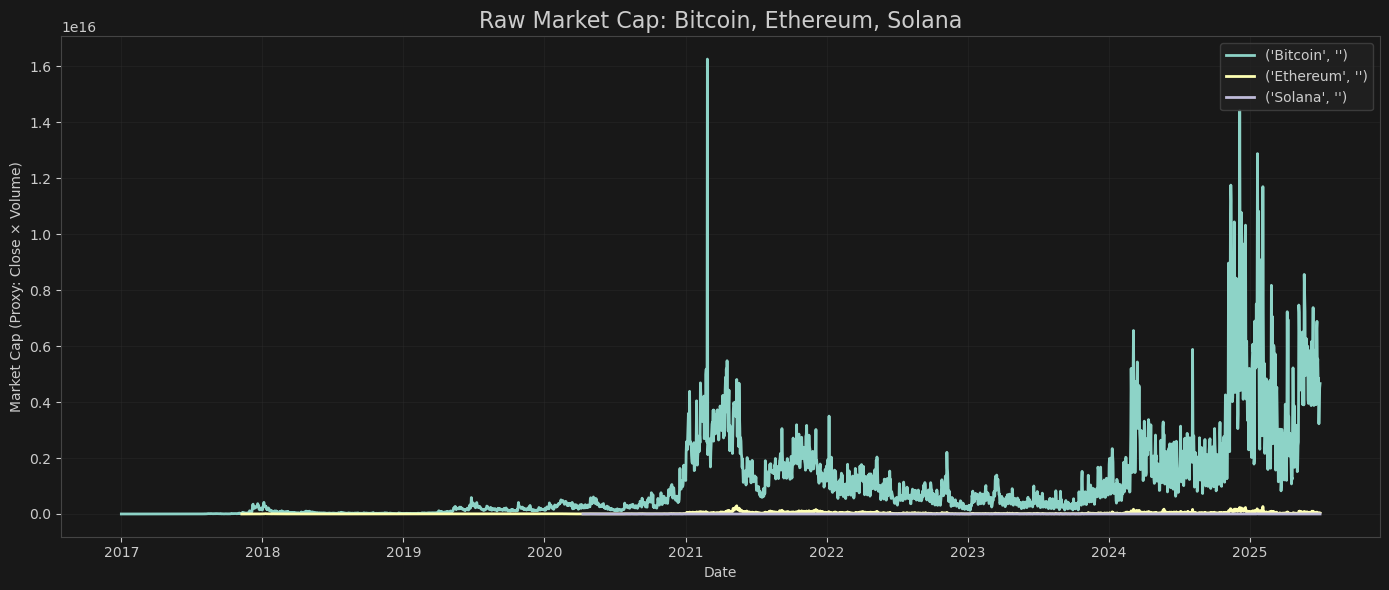

In [31]:
# Plot raw market cap (not normalized) for BTC, ETH, SOL
plt.figure(figsize=(14,6))
for col in crypto_mcap_df.columns:
    plt.plot(crypto_mcap_df.index, crypto_mcap_df[col], label=col, linewidth=2)
plt.title('Raw Market Cap: Bitcoin, Ethereum, Solana', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Market Cap (Proxy: Close × Volume)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\saris\anaconda3\envs\quant\lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning:

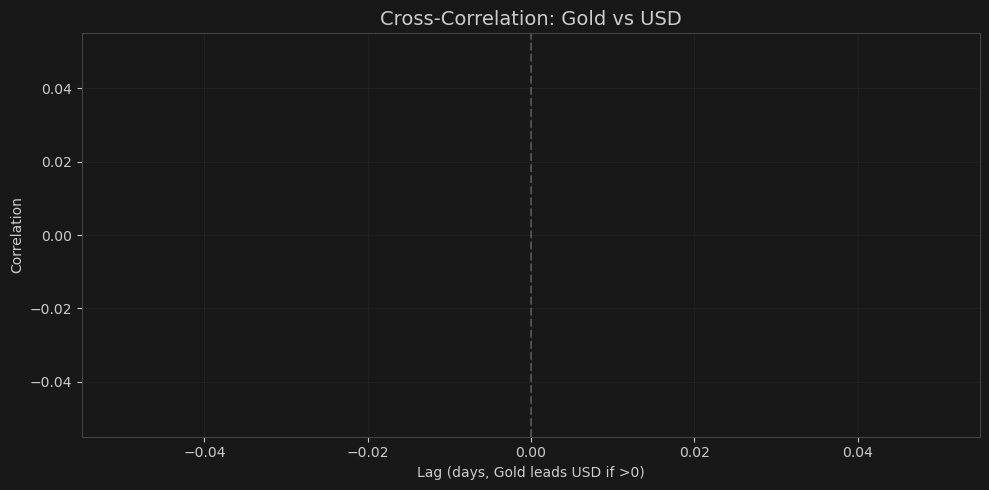

Max correlation at lag -180: nan
Min correlation at lag -180: nan


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2924 and the array at index 1 has size 1

In [32]:
# Lead/Lag Cross-Correlation Analysis (Raw Series)
def plot_crosscorr(x, y, label_x, label_y, max_lag=180):
    lags = np.arange(-max_lag, max_lag+1)
    cc = [np.corrcoef(x.shift(lag).dropna(), y.loc[x.shift(lag).dropna().index])[0,1] for lag in lags]
    plt.figure(figsize=(10,5))
    plt.plot(lags, cc, linewidth=2)
    plt.title(f'Cross-Correlation: {label_x} vs {label_y}', fontsize=14)
    plt.xlabel(f'Lag (days, {label_x} leads {label_y} if >0)')
    plt.ylabel('Correlation')
    plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    max_corr = lags[np.argmax(cc)]
    min_corr = lags[np.argmin(cc)]
    print(f'Max correlation at lag {max_corr}: {np.max(cc):.2f}')
    print(f'Min correlation at lag {min_corr}: {np.min(cc):.2f}')
    return cc, lags

# Gold vs Dollar
plot_crosscorr(macro_df['Gold'].dropna(), macro_df['USD'].reindex(macro_df['Gold'].dropna().index).ffill(), 'Gold', 'USD')

# Bitcoin vs Gold
plot_crosscorr(crypto_mcap_df['Bitcoin'].dropna(), macro_df['Gold'].reindex(crypto_mcap_df['Bitcoin'].dropna().index).ffill(), 'Bitcoin', 'Gold')

# Bitcoin vs Dollar
plot_crosscorr(crypto_mcap_df['Bitcoin'].dropna(), macro_df['USD'].reindex(crypto_mcap_df['Bitcoin'].dropna().index).ffill(), 'Bitcoin', 'USD')

# Bitcoin vs Ethereum
plot_crosscorr(crypto_mcap_df['Bitcoin'].dropna(), crypto_mcap_df['Ethereum'].reindex(crypto_mcap_df['Bitcoin'].dropna().index).ffill(), 'Bitcoin', 'Ethereum')

# Ethereum vs Solana
plot_crosscorr(crypto_mcap_df['Ethereum'].dropna(), crypto_mcap_df['Solana'].reindex(crypto_mcap_df['Ethereum'].dropna().index).ffill(), 'Ethereum', 'Solana')


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\238823311.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_norm.index, crypto_norm[col], label=col, linewidth=2)


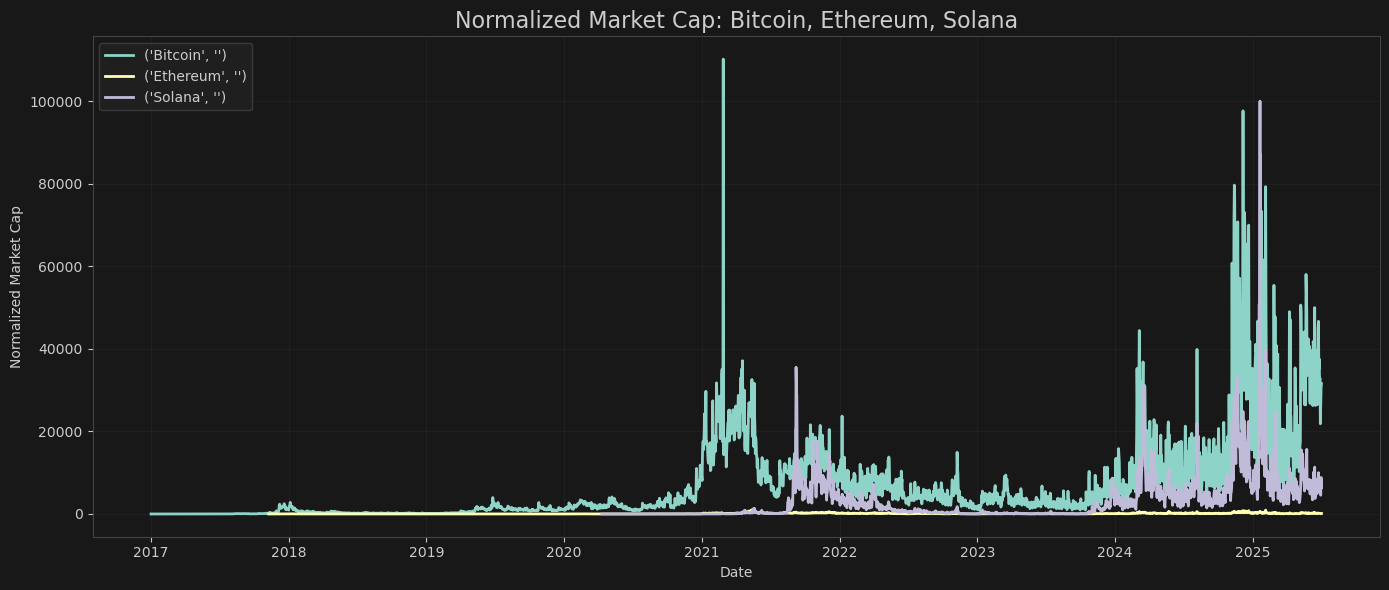

In [ ]:
# 4. Plot Bitcoin, Ethereum, and Solana Market Cap Patterns (Dark Mode)
plt.figure(figsize=(14,6))
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], label=col, linewidth=2)
plt.title('Normalized Market Cap: Bitcoin, Ethereum, Solana', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Market Cap')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


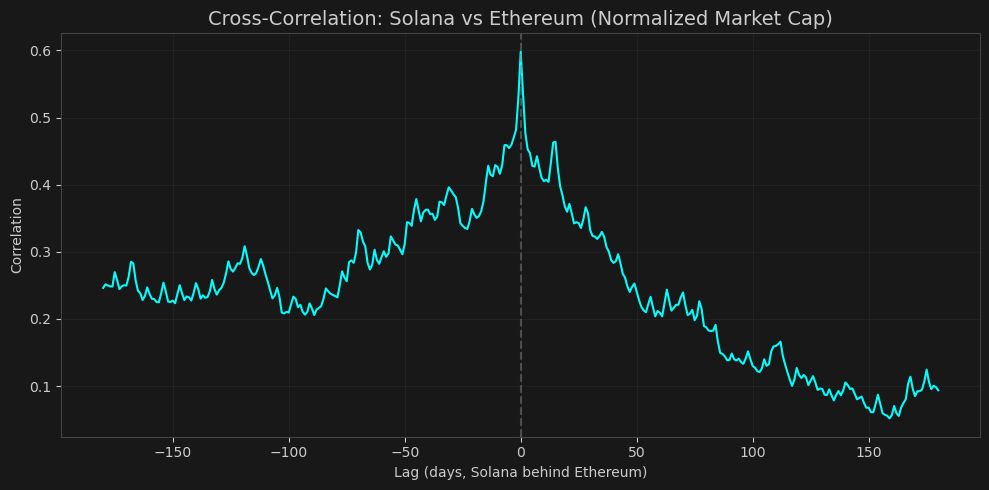

Maximum correlation at lag: 0 days (Solana lags Ethereum)


In [ ]:
# 5. Analyze Lagged Correlation: Solana vs Ethereum (Market Cap)
from scipy.signal import correlate

sol = crypto_norm['Solana'].dropna()
eth = crypto_norm['Ethereum'].reindex(sol.index).ffill()

# Compute cross-correlation
lags = np.arange(-180, 181)
cc = [np.corrcoef(sol.shift(lag).dropna(), eth.loc[sol.shift(lag).dropna().index])[0,1] for lag in lags]

plt.figure(figsize=(10,5))
plt.plot(lags, cc, color='cyan')
plt.title('Cross-Correlation: Solana vs Ethereum (Normalized Market Cap)', fontsize=14)
plt.xlabel('Lag (days, Solana behind Ethereum)')
plt.ylabel('Correlation')
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

max_lag = lags[np.argmax(cc)]
print(f'Maximum correlation at lag: {max_lag} days (Solana lags Ethereum)')

C:\Users\saris\AppData\Local\Temp\ipykernel_7328\4172288825.py:13: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)


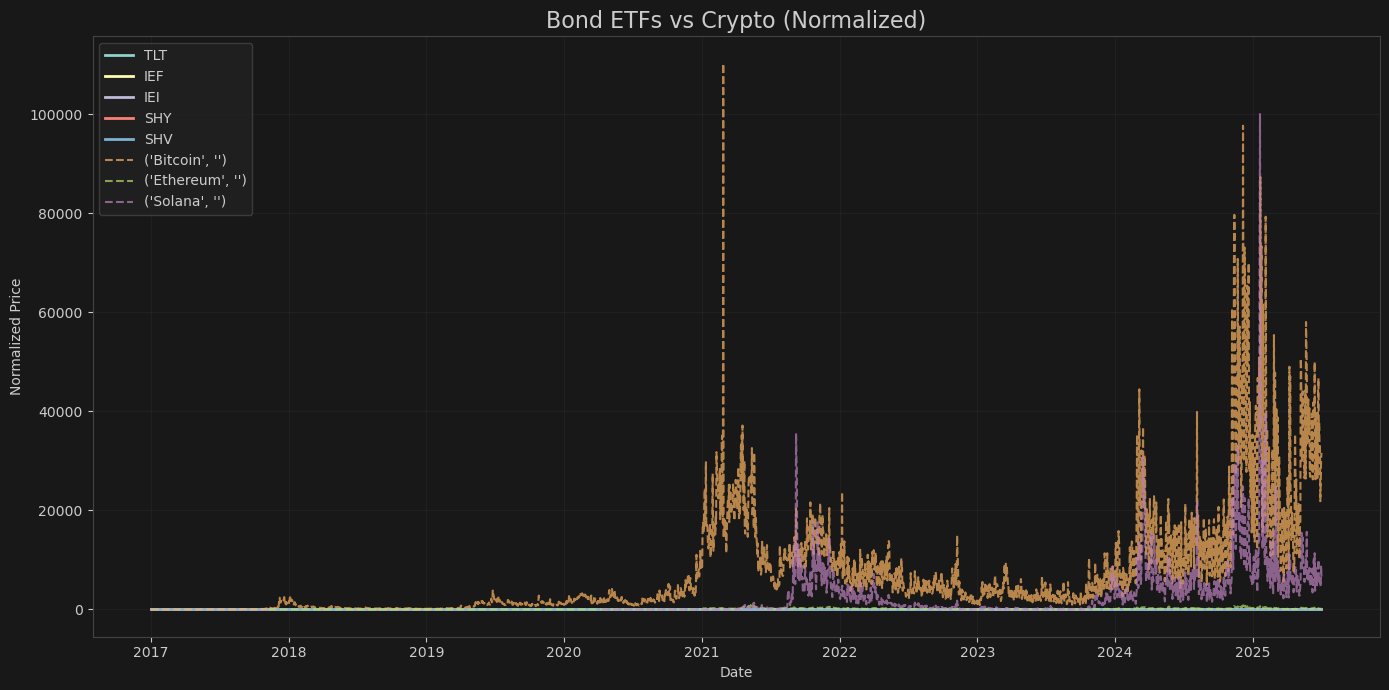

In [ ]:
# 6. Plot All Bond ETFs vs Cryptos (Dark Mode)
bond_cols = ['TLT', 'IEF', 'IEI', 'SHY', 'SHV']
macro_norm = macro_df.copy()
for col in macro_norm.columns:
    first_valid = macro_norm[col].first_valid_index()
    macro_norm[col] = macro_norm[col] / macro_norm[col].loc[first_valid]
macro_norm = macro_norm.ffill()

plt.figure(figsize=(14,7))
for col in bond_cols:
    plt.plot(macro_norm.index, macro_norm[col], label=col, linewidth=2)
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)
plt.title('Bond ETFs vs Crypto (Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\2006682214.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)


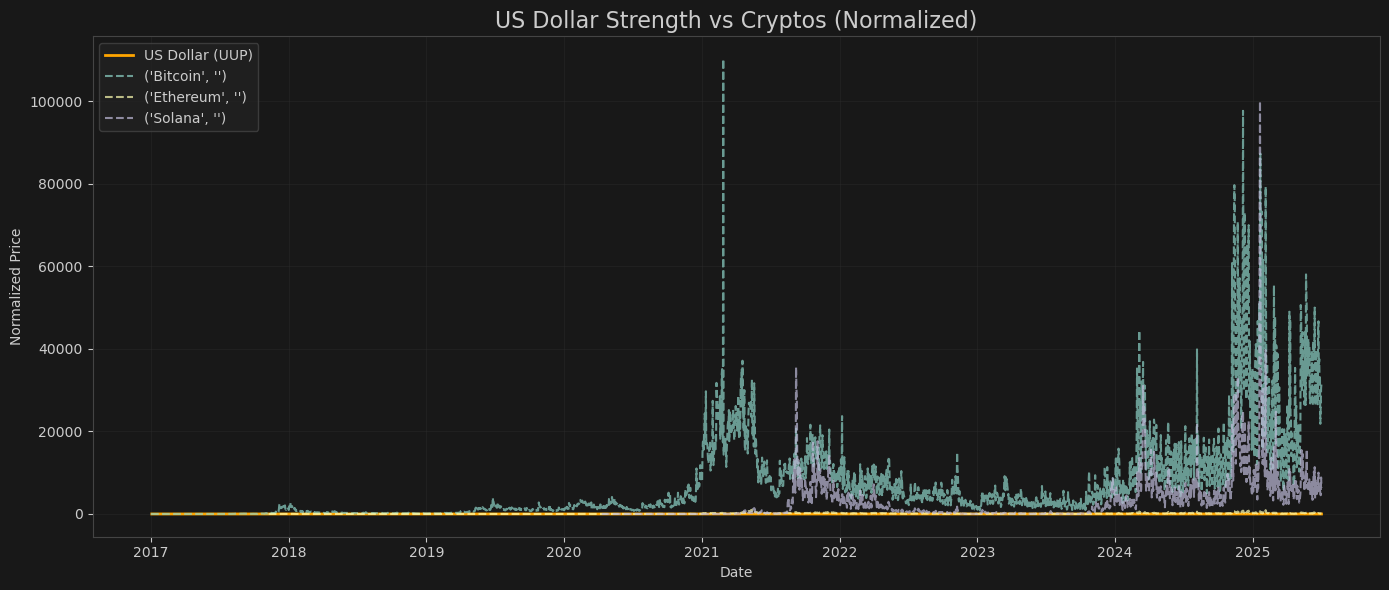

In [ ]:
# 7. Plot US Dollar Strength vs Cryptos (Dark Mode)
plt.figure(figsize=(14,6))
plt.plot(macro_norm.index, macro_norm['USD'], label='US Dollar (UUP)', color='orange', linewidth=2)
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)
plt.title('US Dollar Strength vs Cryptos (Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\45494992.py:5: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)


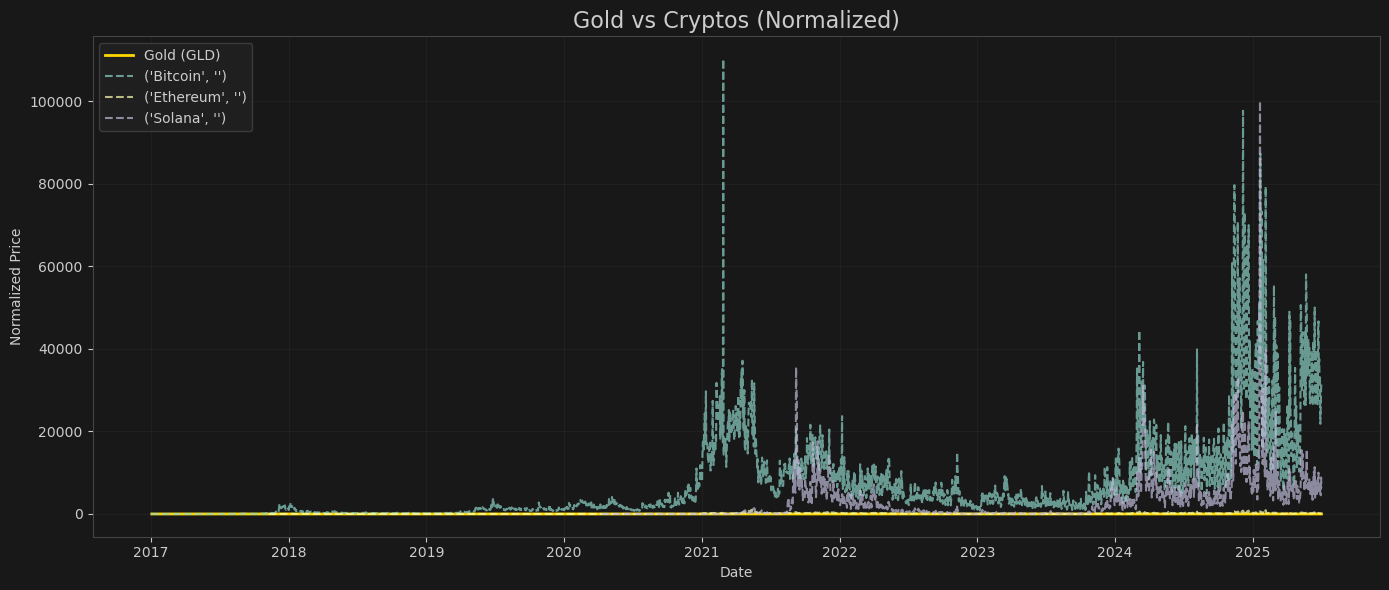

In [ ]:
# 8. Plot Gold vs Cryptos (Dark Mode)
plt.figure(figsize=(14,6))
plt.plot(macro_norm.index, macro_norm['Gold'], label='Gold (GLD)', color='gold', linewidth=2)
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)
plt.title('Gold vs Cryptos (Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\88164653.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end, progress=False)[['Close']]
C:\Users\saris\AppData\Local\Temp\ipykernel_7328\355078123.py:22: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(equity_norm.index, equity_norm[col], 

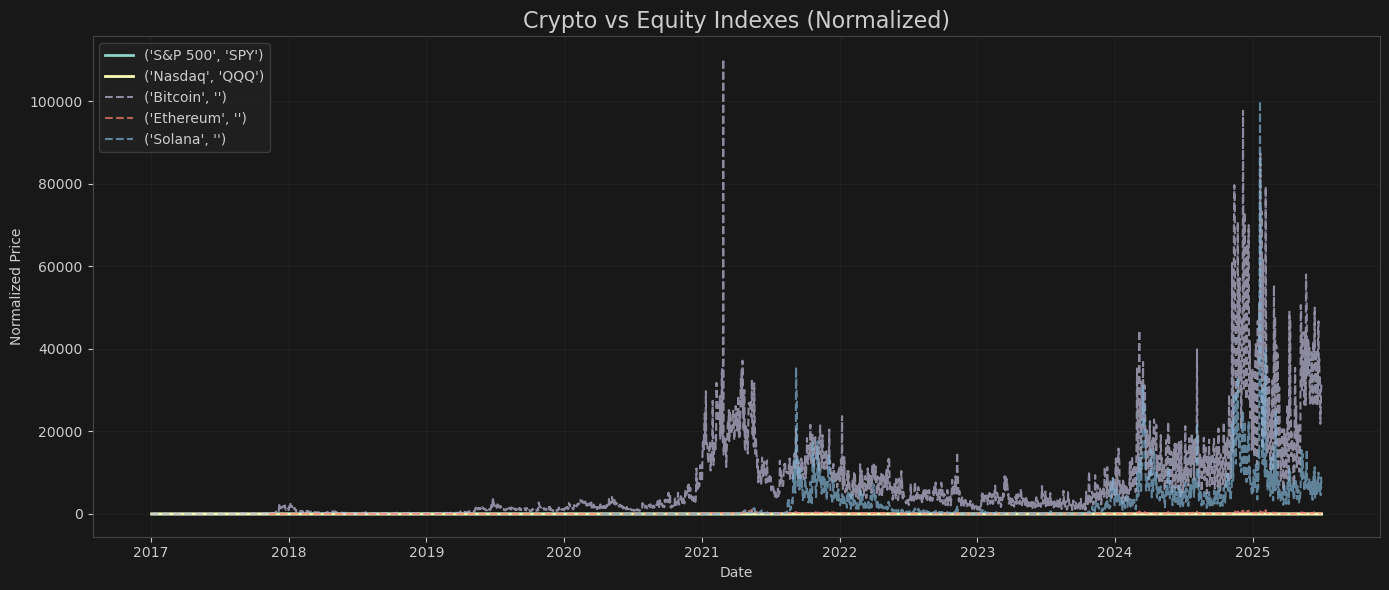

C:\Users\saris\AppData\Local\Temp\ipykernel_7328\355078123.py:36: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)


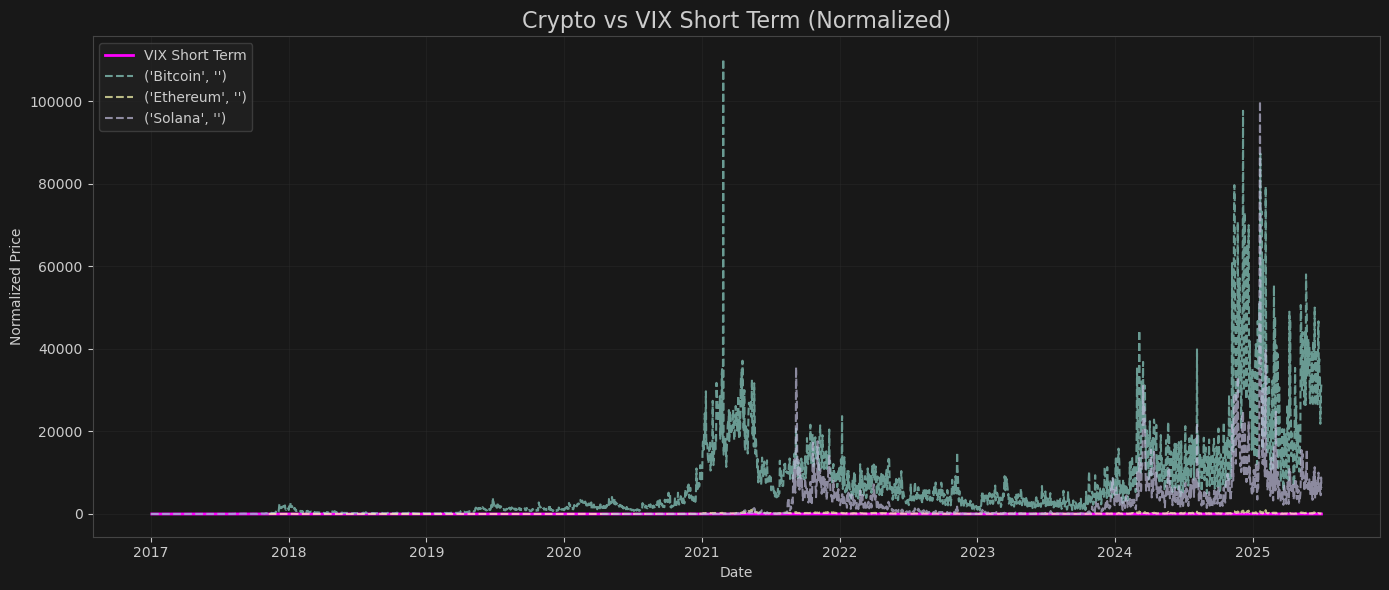

In [ ]:
# 9. Explore Additional Interesting Relationships (Dark Mode)
# Example: Crypto vs S&P 500, Nasdaq, and VIX short-term (if available)
equity_tickers = {'S&P 500': 'SPY', 'Nasdaq': 'QQQ'}
vix_ticker = {'VIX Short Term': 'VIXY'}
equity_df = download_tickers(equity_tickers, start_date, end_date)
vix_df = download_tickers(vix_ticker, start_date, end_date)

# Normalize
equity_norm = equity_df.copy()
for col in equity_norm.columns:
    first_valid = equity_norm[col].first_valid_index()
    equity_norm[col] = equity_norm[col] / equity_norm[col].loc[first_valid]
equity_norm = equity_norm.ffill()
vix_norm = vix_df.copy()
for col in vix_norm.columns:
    first_valid = vix_norm[col].first_valid_index()
    vix_norm[col] = vix_norm[col] / vix_norm[col].loc[first_valid]
vix_norm = vix_norm.ffill()

plt.figure(figsize=(14,6))
for col in equity_norm.columns:
    plt.plot(equity_norm.index, equity_norm[col], label=col, linewidth=2)
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)
plt.title('Crypto vs Equity Indexes (Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(vix_norm.index, vix_norm['VIX Short Term'], label='VIX Short Term', color='magenta', linewidth=2)
for col in crypto_norm.columns:
    plt.plot(crypto_norm.index, crypto_norm[col], '--', label=col, alpha=0.7)
plt.title('Crypto vs VIX Short Term (Normalized)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


c:\Users\saris\anaconda3\envs\quant\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
Fetching market caps (365d): 100%|██████████| 11/11 [02:13<00:00, 12.11s/it]
C:\Users\saris\AppData\Local\Temp\ipykernel_33564\602138645.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_caps = market_caps.fillna(method='ffill').dropna()


Error fetching Hedera: {'error': 'coin not found'}


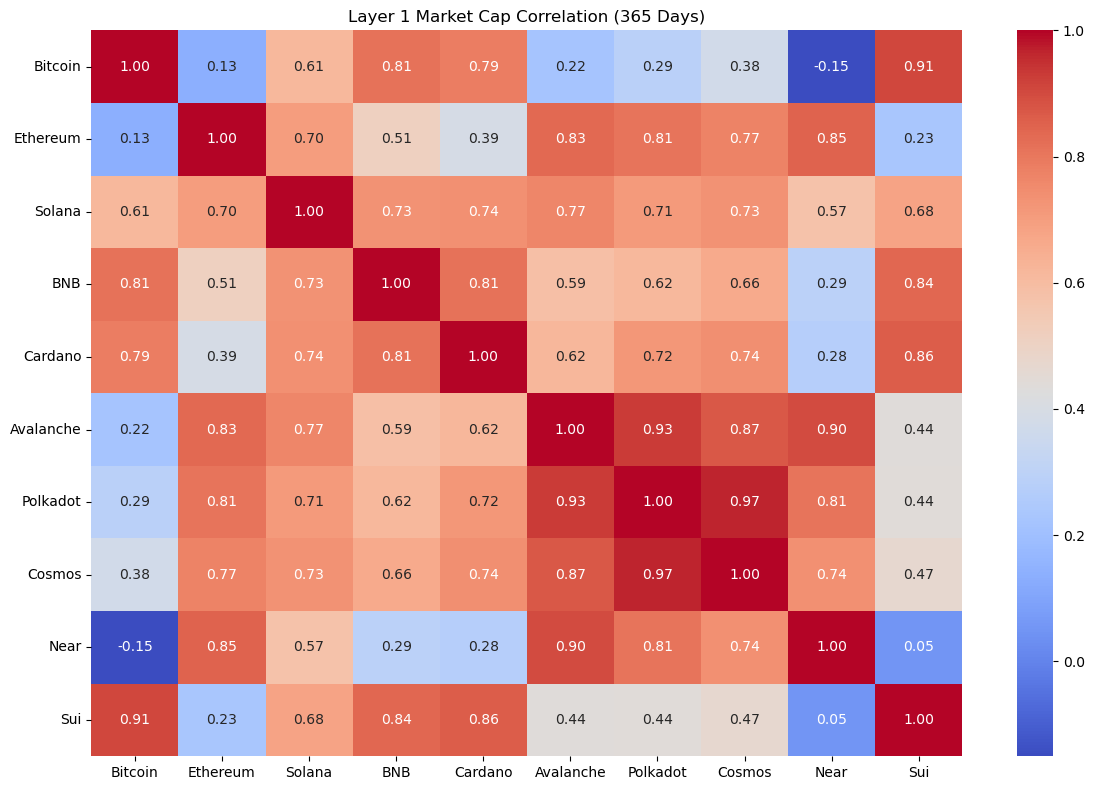

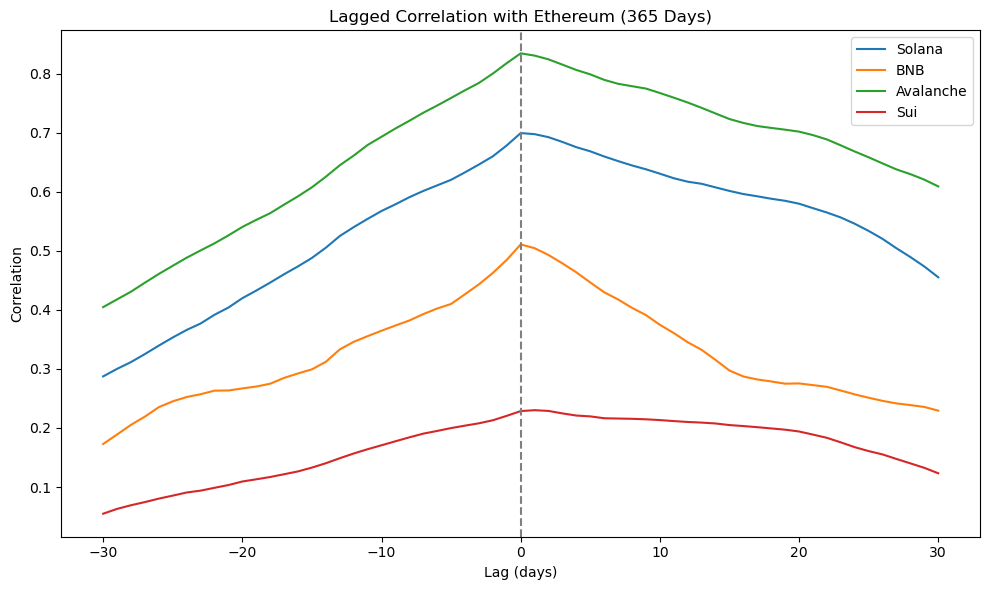

In [1]:
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pycoingecko import CoinGeckoAPI

cg = CoinGeckoAPI()

# List of Layer 1s with CoinGecko IDs
L1_COINS = {
    'Bitcoin': 'bitcoin',
    'Ethereum': 'ethereum',
    'Solana': 'solana',
    'BNB': 'binancecoin',
    'Cardano': 'cardano',
    'Avalanche': 'avalanche-2',
    'Polkadot': 'polkadot',
    'Cosmos': 'cosmos',
    'Near': 'near',
    'Sui': 'sui',
    'Hedera': 'hedera',
    # 'Aptos': 'aptos',
    # 'Fantom': 'fantom',
    # 'Tezos': 'tezos'
}

CACHE_DIR = "../data/crypto_marketcaps"
os.makedirs(CACHE_DIR, exist_ok=True)

def fetch_market_cap_365(coin_id, name):
    filepath = os.path.join(CACHE_DIR, f"{name}_365.csv")
    if os.path.exists(filepath):
        return pd.read_csv(filepath, parse_dates=['timestamp'], index_col='timestamp')
    try:
        data = cg.get_coin_market_chart_by_id(id=coin_id, vs_currency='usd', days=365)
        df = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)
        df.rename(columns={'market_cap': name}, inplace=True)
        df.to_csv(filepath)
        return df
    except Exception as e:
        print(f"Error fetching {name}: {e}")
        return pd.DataFrame()

# Fetch market cap data
dfs = []
for name, coin_id in tqdm(L1_COINS.items(), desc="Fetching market caps (365d)"):
    df = fetch_market_cap_365(coin_id, name)
    if not df.empty:
        dfs.append(df)
        time.sleep(1.2)  # Avoid rate limit

# Merge all into single DataFrame
market_caps = pd.concat(dfs, axis=1)
market_caps = market_caps.fillna(method='ffill').dropna()

# Normalize data for correlation analysis
norm_mcaps = (market_caps - market_caps.mean()) / market_caps.std()

# === Correlation Heatmap ===
plt.figure(figsize=(12, 8))
sns.heatmap(norm_mcaps.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Layer 1 Market Cap Correlation (365 Days)")
plt.tight_layout()
plt.show()

# === Lagged Correlation vs Ethereum ===
def lagged_corr(df, lead_coin, lag_coin, max_lag=30):
    lags = range(-max_lag, max_lag + 1)
    corrs = [df[lead_coin].corr(df[lag_coin].shift(lag)) for lag in lags]
    return pd.Series(corrs, index=lags)

plt.figure(figsize=(10, 6))
for coin in ['Solana', 'BNB', 'Avalanche', 'Sui', 'Aptos']:
    if coin in norm_mcaps.columns:
        lc = lagged_corr(norm_mcaps, 'Ethereum', coin)
        plt.plot(lc.index, lc.values, label=coin)

plt.axvline(0, color='gray', linestyle='--')
plt.title("Lagged Correlation with Ethereum (365 Days)")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.legend()
plt.tight_layout()
plt.show()


Error for hedera: {'error': 'coin not found'}
Error for avalanche: {'error': 'coin not found'}
                          Bitcoin      Ethereum        Solana           Sui  \
timestamp                                                                     
2025-07-02 21:08:44           NaN           NaN  8.187869e+10           NaN   
2025-07-02 21:08:55  2.171801e+12  3.128687e+11           NaN  1.013819e+10   
2025-07-02 21:09:14           NaN           NaN           NaN           NaN   
2025-07-02 21:10:07           NaN           NaN           NaN           NaN   
2025-07-02 21:10:25           NaN           NaN           NaN           NaN   

                           Ripple       Cardano          NEAR  
timestamp                                                      
2025-07-02 21:08:44           NaN           NaN           NaN  
2025-07-02 21:08:55           NaN           NaN           NaN  
2025-07-02 21:09:14  1.332422e+11           NaN           NaN  
2025-07-02 21:10:07           N

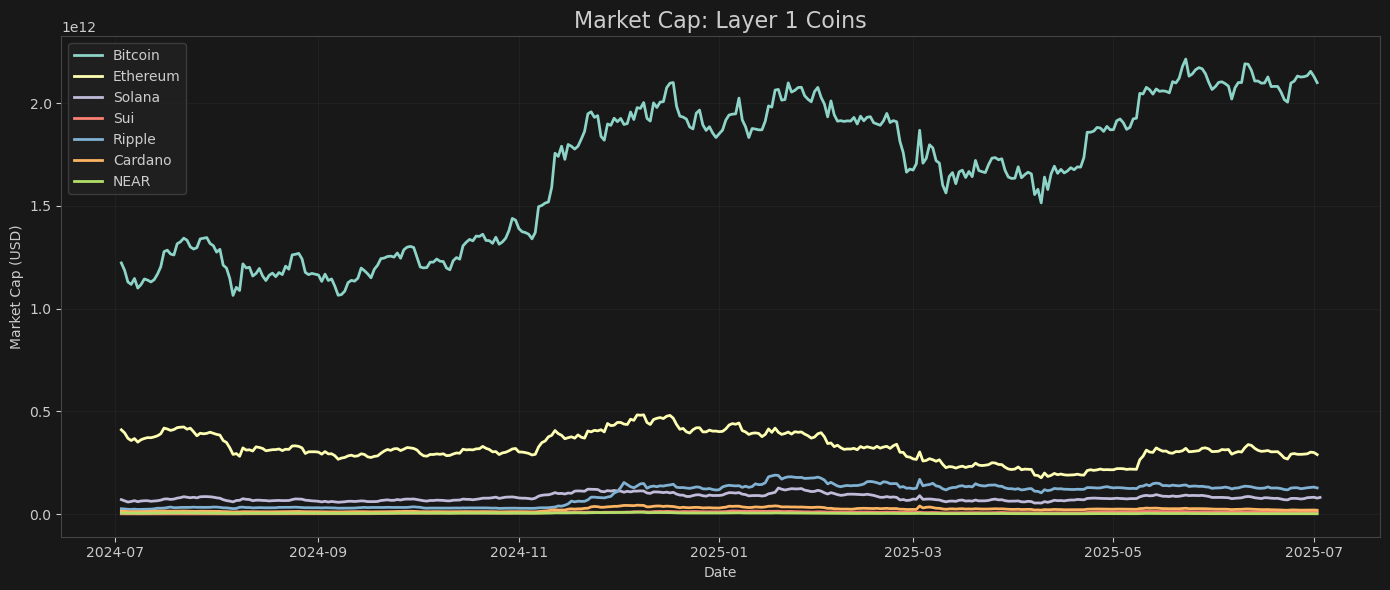